<a href="https://colab.research.google.com/github/mathuscm/PJ4_Analise_Combustivel/blob/main/Arquivo%20principal%20e%20datasets/projetoemgrupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório da Agência Nacional de Petróleo, Gás Natural e Biocombustíveis (ANP)**

Faremos um levantamento sobre os preços dos combustíveis nos meses de "maio e junho de 2023" para a Agência Nacional de Petróleo, Gás Natural e Biocombustíveis (ANP) nas diferentes regiões do Brasil, os dados foram coletados do site (https://www.gov.br/pt-br) para fazer uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.

<font color = blue> Análise deve responder às seguintes perguntas:

- 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou alta?
- 2. Qual o preço médio da gasolina e do etanol nesses dois meses?
- 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
- 4. Qual o preço médio da gasolina e do etanol por estado?
- 5. Qual o município que possui o menor preço para a gasolina e para o etanol?
- 6. Qual o município que possui o maior preço para a gasolina e para o etanol?
- 7. Qual a região que possui o maior valor médio da gasolina?
- 8. Qual a região que possui o menor valor médio do etanol?
- 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
- 10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
- 11. Qual a Bandeira que possui o maior preço para a gasolina e para o etanol?

Acompanhar os preços dos combustíveis é de grande importância por que afeta o dia a dia do cidadão brasileiro
como alimentos, preços de viagens, fretes entre outros fatores.

In [376]:
# Importando as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [377]:
# Abrir arquivos dos dados dos preços da gasolina e etanol mês de maio.
precos_gaso_et5 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv', sep=';')
display(precos_gaso_et5)


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,01/05/2023,"3,79",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,01/05/2023,"4,69",NaN,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,ETANOL,01/05/2023,"5,49",NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58485,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,ETANOL,31/05/2023,"3,49",NaN,R$ / litro,IPIRANGA
58486,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,GASOLINA ADITIVADA,31/05/2023,"4,99",NaN,R$ / litro,IPIRANGA
58487,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,GASOLINA,31/05/2023,"4,69",NaN,R$ / litro,IPIRANGA
58488,SE,SP,PIRASSUNUNGA,AUTO POSTO PADRE ANTONI LTDA,45.224.849/0001-87,AVENIDA PADRE ANTONIO VANN ESS,1144,NaN,CENTRO,13630-025,ETANOL,31/05/2023,"3,49",NaN,R$ / litro,IPIRANGA


<font size=6> 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou Alta?


In [378]:
# transformando strings em números flutuantes
precos_gaso_et5['Valor de Venda'] = precos_gaso_et5['Valor de Venda'].str.replace(',', '.').astype(float)


In [379]:
#retirando preços duplicados
precos_gaso_et5_sem_dupli = precos_gaso_et5.drop_duplicates(subset=['Valor de Venda'])
precos_gaso_et5_sem_dupli

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,01/05/2023,3.79,NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,01/05/2023,4.69,NaN,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,ETANOL,01/05/2023,5.49,NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,01/05/2023,6.97,NaN,R$ / litro,IPIRANGA
5,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,01/05/2023,4.58,NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45923,SE,MG,PATOS DE MINAS,POSTO SEM FRONTEIRA LTDA,68.508.571/0001-75,AVENIDA JUSCELINO KUBITSCHEK DE OLIVEIRA,3350,LOJA A,PLANALTO,38706-801,ETANOL,25/05/2023,3.41,NaN,R$ / litro,BRANCA
47508,SE,SP,DIADEMA,AUTO POSTO CAR MAX 2 LTDA,01.592.861/0001-79,RUA DAS AMEIXEIRAS,1033,NaN,JD MARAVILHA,09940-400,ETANOL,26/05/2023,3.12,NaN,R$ / litro,BRANCA
52670,SE,SP,ARARAQUARA,POSTO LEBRAO DE ARARAQUARA LTDA.,04.673.832/0001-20,AVENIDA BARROSO,469,NaN,CENTRO,14801-160,ETANOL,30/05/2023,3.17,NaN,R$ / litro,BRANCA
52774,SE,SP,MATAO,AUTO POSTO 21 DE MATAO LTDA,03.687.679/0001-27,RUA SAO LOURENCO,380,NaN,CENTRO,15990-005,ETANOL,30/05/2023,3.07,NaN,R$ / litro,BRANCA


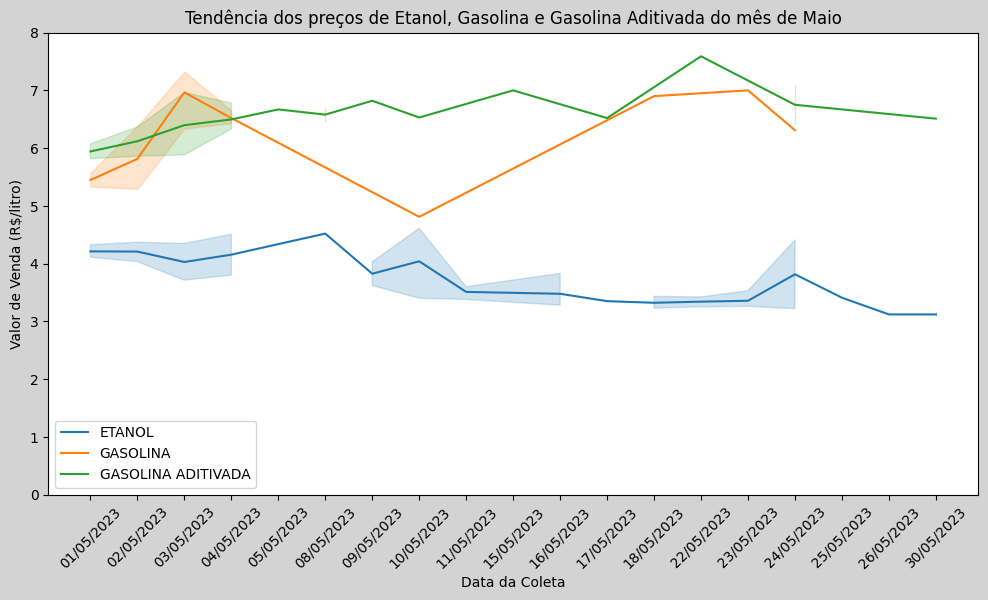

In [380]:
# Gráfico da gasolina
df_combustivel_5 = precos_gaso_et5_sem_dupli[precos_gaso_et5_sem_dupli['Produto'].isin(['GASOLINA', 'GASOLINA ADITIVADA', 'ETANOL'])]

# criar eixos
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_combustivel_5, x='Data da Coleta', y='Valor de Venda', hue='Produto')
plt.title('Tendência dos preços de Etanol, Gasolina e Gasolina Aditivada do mês de Maio')
plt.xlabel('Data da Coleta')
plt.ylabel('Valor de Venda (R$/litro)')
plt.xticks(rotation=45)
plt.ylim(0, 8)
plt.legend()
fig.patch.set_facecolor('lightgray')
plt.show()

In [381]:
# Filtrar dados da gasolina e etanol do mês de junho
precos_gaso_et6 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv', sep=';')
display(precos_gaso_et6)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,ETANOL,01/06/2023,"4,31",NaN,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,GASOLINA,01/06/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,ETANOL,01/06/2023,"4,19",NaN,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA ADITIVADA,01/06/2023,"5,36",NaN,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA,01/06/2023,"5,29",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49036,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,LOTEAMENTO JARDIM FL AMBOYANTS,VILA DE ABRANTES,42840-000,GASOLINA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA
49037,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,ETANOL,30/06/2023,"4,44",NaN,R$ / litro,BRANCA
49038,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA ADITIVADA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA
49039,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA


In [382]:
# transformando strings em números flutuantes
precos_gaso_et6['Valor de Venda'] = precos_gaso_et6['Valor de Venda'].str.replace(',', '.').astype(float)

In [383]:
precos_gaso_et6_sem_dupli = precos_gaso_et6.drop_duplicates(subset=['Valor de Venda'])
precos_gaso_et6_sem_dupli

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,ETANOL,01/06/2023,4.31,NaN,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,GASOLINA,01/06/2023,5.39,NaN,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,ETANOL,01/06/2023,4.19,NaN,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA ADITIVADA,01/06/2023,5.36,NaN,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA,01/06/2023,5.29,NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46578,NE,PI,TERESINA,POSTO HIDROLANDIA LTDA,03.069.763/0003-49,AVENIDA MIGUEL ROSA,5635,NaN,MACAUBA,64018-550,ETANOL,28/06/2023,4.42,NaN,R$ / litro,BRANCA
46926,S,RS,BAGE,SIM REDE DE POSTOS LTDA,07.473.735/0155-37,AVENIDA ESPANHA,299,NaN,TARUMA,96408-000,GASOLINA ADITIVADA,28/06/2023,6.54,NaN,R$ / litro,IPIRANGA
47783,N,AM,TEFE,M DOS S TELLO SOBRINHO,05.657.534/0001-09,RUA MARECHAL DEODORO,17,NaN,SANTA ROSA,69552-035,GASOLINA,29/06/2023,6.80,NaN,R$ / litro,BRANCA
47804,NE,BA,EUNAPOLIS,GEO MERCANTIL DE DERIVADOS DE PETROLEO LTDA,02.114.331/0001-88,RODOVIA BR 101,S/N,KM 720 LADO ESQUERDO ...,URBIS I,45829-110,GASOLINA,29/06/2023,6.46,NaN,R$ / litro,IPIRANGA


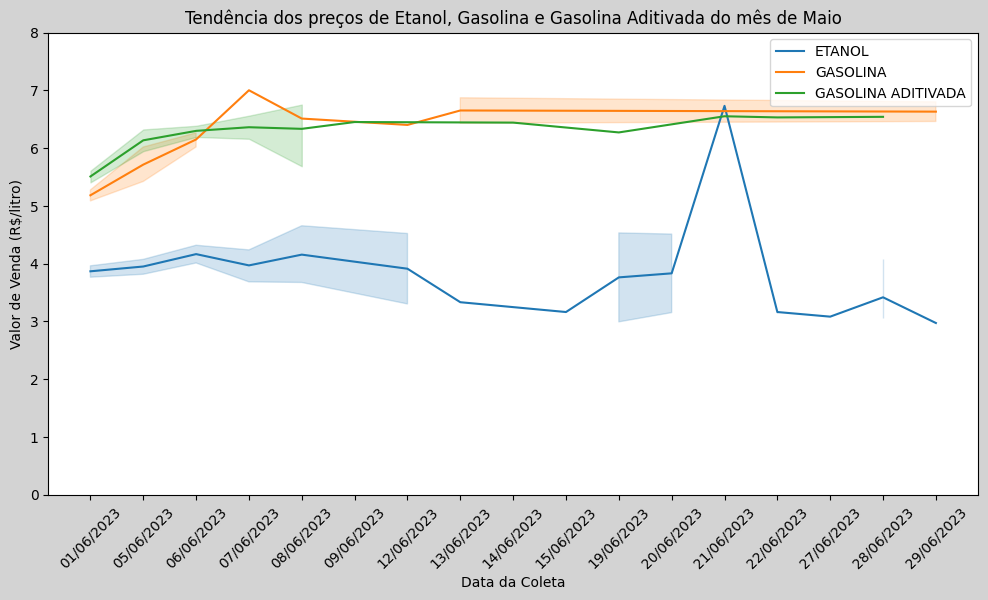

In [384]:
# Gráfico da gasolina
df_combustivel_6 = precos_gaso_et6_sem_dupli[precos_gaso_et6_sem_dupli['Produto'].isin(['GASOLINA', 'GASOLINA ADITIVADA', 'ETANOL'])]

# criar eixos
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_combustivel_6, x='Data da Coleta', y='Valor de Venda', hue='Produto')
plt.title('Tendência dos preços de Etanol, Gasolina e Gasolina Aditivada do mês de Maio')
plt.xlabel('Data da Coleta')
plt.ylabel('Valor de Venda (R$/litro)')
plt.xticks(rotation=45)
plt.ylim(0, 8)
plt.legend()
fig.patch.set_facecolor('lightgray')
plt.show()

In [385]:
# Concatenar as tabelas e juntas os indices
# pode ser esse tambem mas ele nao junta os indices keys=['mes5', 'mes6']
tabelas_preco_gasol_etan = pd.concat([precos_gaso_et5, precos_gaso_et6], ignore_index=True)
tabelas_preco_gasol_etan

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,01/05/2023,3.79,NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,01/05/2023,4.69,NaN,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,ETANOL,01/05/2023,5.49,NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,01/05/2023,6.97,NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA,01/05/2023,6.97,NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107526,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,LOTEAMENTO JARDIM FL AMBOYANTS,VILA DE ABRANTES,42840-000,GASOLINA,30/06/2023,5.64,NaN,R$ / litro,BRANCA
107527,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,ETANOL,30/06/2023,4.44,NaN,R$ / litro,BRANCA
107528,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA ADITIVADA,30/06/2023,5.64,NaN,R$ / litro,BRANCA
107529,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA,30/06/2023,5.64,NaN,R$ / litro,BRANCA


In [386]:
# analisando a quantidades de números nan por colunas
valores_nulos = tabelas_preco_gasol_etan.isna().sum()
valores_nulos

Regiao - Sigla            0
Estado - Sigla            0
Municipio                 0
Revenda                   0
CNPJ da Revenda           0
Nome da Rua               0
Numero Rua               45
Complemento           83683
Bairro                  226
Cep                       0
Produto                   0
Data da Coleta            0
Valor de Venda            0
Valor de Compra      107531
Unidade de Medida         0
Bandeira                  0
dtype: int64

In [387]:
# Deletando colunas usando o drop para fazer a limpeza adequada da tabela.
tabelas_preco_gasol_etan2 = tabelas_preco_gasol_etan.drop(columns=['Revenda','CNPJ da Revenda','Valor de Compra','Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Unidade de Medida'])


In [388]:
# Renomear nomes das colunas
tabelas_preco_gasol_etan3 = tabelas_preco_gasol_etan2.rename(columns=lambda x: x.replace('Regiao - Sigla', 'Sigla_Regiao').replace('Estado - Sigla','Sigla_Estado').replace('Data da Coleta','Data_da_Coleta').replace('Valor de Venda','Valor_de_Venda',))
tabelas_preco_gasol_etan3

,Sigla_Regiao,Sigla_Estado,Municipio,Produto,Data_da_Coleta,Valor_de_Venda,Bandeira
0,SE,SP,SOROCABA,ETANOL,01/05/2023,3.79,BRANCA
1,SE,SP,SOROCABA,GASOLINA,01/05/2023,4.69,BRANCA
2,N,AC,CRUZEIRO DO SUL,ETANOL,01/05/2023,5.49,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,GASOLINA ADITIVADA,01/05/2023,6.97,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,GASOLINA,01/05/2023,6.97,IPIRANGA
...,...,...,...,...,...,...,...
107526,NE,BA,CAMACARI,GASOLINA,30/06/2023,5.64,BRANCA
107527,NE,BA,CAMACARI,ETANOL,30/06/2023,4.44,BRANCA
107528,NE,BA,CAMACARI,GASOLINA ADITIVADA,30/06/2023,5.64,BRANCA
107529,NE,BA,CAMACARI,GASOLINA,30/06/2023,5.64,BRANCA


In [389]:
# simplificando o nome do dataframe
df = tabelas_preco_gasol_etan3

<Axes: >

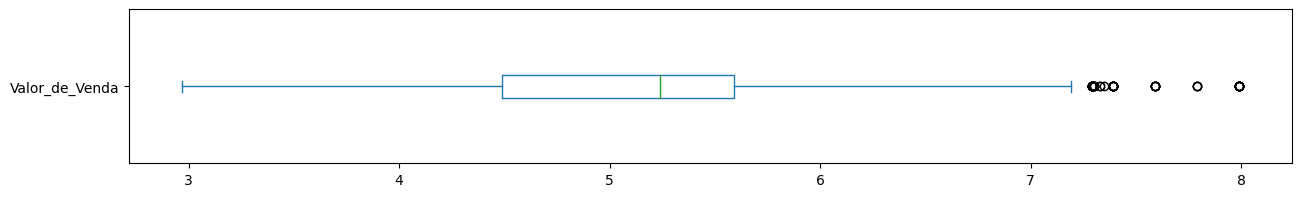

In [390]:
# verificar outliers
df['Valor_de_Venda'].plot.box(vert=False, figsize=(15,2))

In [391]:
#mostra estatísticas descritivas para o valores de vendas
df.describe()

,Valor_de_Venda
count,107531.000000
mean,5.029773
std,0.764142
min,2.970000
25%,4.490000
50%,5.240000
75%,5.590000
max,7.990000


In [392]:
# analisando se a colunas nan na nova tabela
valores_nulos2 = df.isna().sum()
valores_nulos2

Sigla_Regiao      0
Sigla_Estado      0
Municipio         0
Produto           0
Data_da_Coleta    0
Valor_de_Venda    0
Bandeira          0
dtype: int64

<font size=6> 2. Qual o preço médio da gasolina e do etanol nesses dois meses?

In [393]:
# Média total por produto citado na tabela
media_por_produto = df.groupby('Produto')['Valor_de_Venda'].mean()
media_por_produto

Produto
ETANOL                4.100088
GASOLINA              5.397903
GASOLINA ADITIVADA    5.579708
Name: Valor_de_Venda, dtype: float64

<font size=6> 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [394]:
# Realizando filtragem dos produtos citados para verificar os preços médios mais caros

df_gaso_etanol = df[df['Produto'].isin(['GASOLINA', 'ETANOL', 'GASOLINA ADITIVADA'])]
media_combustivel = df_gaso_etanol.groupby(['Sigla_Estado', 'Produto'])['Valor_de_Venda'].mean()
df_precos = media_combustivel.reset_index()
media_gasolina = df_precos[df_precos['Produto'] == 'GASOLINA']
media_etanol = df_precos[df_precos['Produto'] == 'ETANOL']
media_gas_aditivada = df_precos[df_precos['Produto'] == 'GASOLINA ADITIVADA']
top_etanol = media_etanol.sort_values(by='Valor_de_Venda', ascending = False).head(5)
top_gasolina = media_gasolina.sort_values(by='Valor_de_Venda', ascending = False).head(5)
top_aditivada = media_gas_aditivada.sort_values(by='Valor_de_Venda', ascending = False).head(5)
print(top_etanol)
print(top_gasolina)
print(top_aditivada)

   Sigla_Estado Produto  Valor_de_Venda
9            AP  ETANOL        5.240000
63           RR  ETANOL        5.050000
60           RO  ETANOL        4.948502
66           RS  ETANOL        4.871154
0            AC  ETANOL        4.783437
   Sigla_Estado   Produto  Valor_de_Venda
7            AM  GASOLINA        6.361536
1            AC  GASOLINA        6.121221
61           RO  GASOLINA        5.899349
64           RR  GASOLINA        5.858431
4            AL  GASOLINA        5.674847
   Sigla_Estado             Produto  Valor_de_Venda
8            AM  GASOLINA ADITIVADA        6.335013
2            AC  GASOLINA ADITIVADA        6.149636
62           RO  GASOLINA ADITIVADA        5.973808
65           RR  GASOLINA ADITIVADA        5.931223
5            AL  GASOLINA ADITIVADA        5.806593


<font size=6> 4. Qual o preço médio do Etanol da Gasolina e Gasolina Aditivada por Estado (BR)?

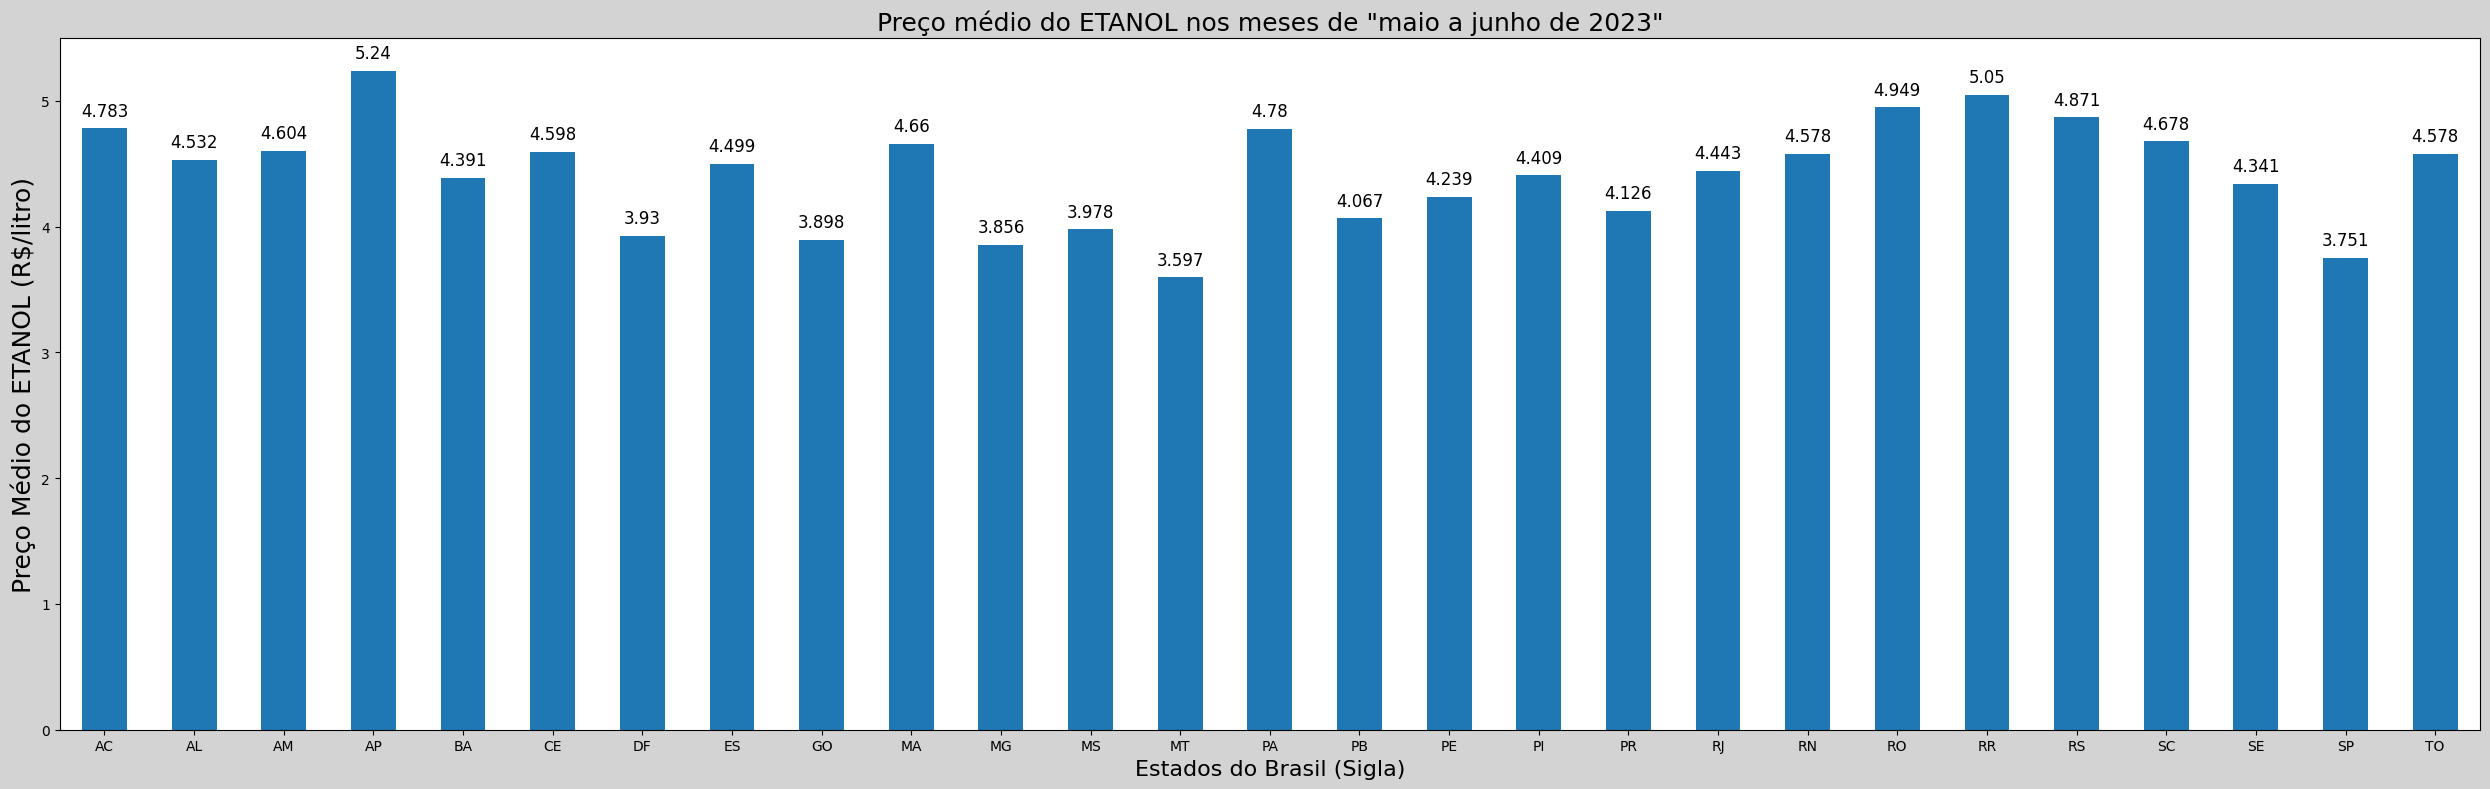

In [395]:
preco_etanol = df[df['Produto'] == 'ETANOL'].groupby('Sigla_Estado')['Valor_de_Venda'].mean().round(3)
preco_etanol


fig, ax = plt.subplots(figsize=(25, 8))
preco_etanol.plot(kind='bar', rot=0 )

for idx , val in enumerate(preco_etanol):
    txt = f'{val}'
    y_coord = val + 0.1
    x_coord = idx # posição de cada barra pode ter um delocamento ex 0.15

    # Adicionar e formatar o texto acima da barra
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12, ha='center')

plt.title('Preço médio do ETANOL nos meses de "maio a junho de 2023"', fontsize=18)
plt.xlabel('Estados do Brasil (Sigla)', fontsize=16)
plt.ylabel('Preço Médio do ETANOL (R$/litro)', fontsize=18)
plt.tight_layout()
fig.patch.set_facecolor('lightgray')
plt.show()

### <font color = green> Análise do Etanol para os Estados do Brasil
- Ao analisar os preços do Etanol nos diferentes Estados do Brasil notamos que Amapá-(AP) e Roraima-(RR) tiveram os maiores preços para o produto para os eses de Maio e Junho de 2023, diverso fatores podem contribuir para o preço do produto um deles e a distância do estado para os estados com o maior número de produção de etanol do país, como São Paulo, que teve um dos menores preços e é líder em produção de etanol segundo a (SEADE) Sistema Estadual de Análise de Dados (https://www.seade.gov.br/)

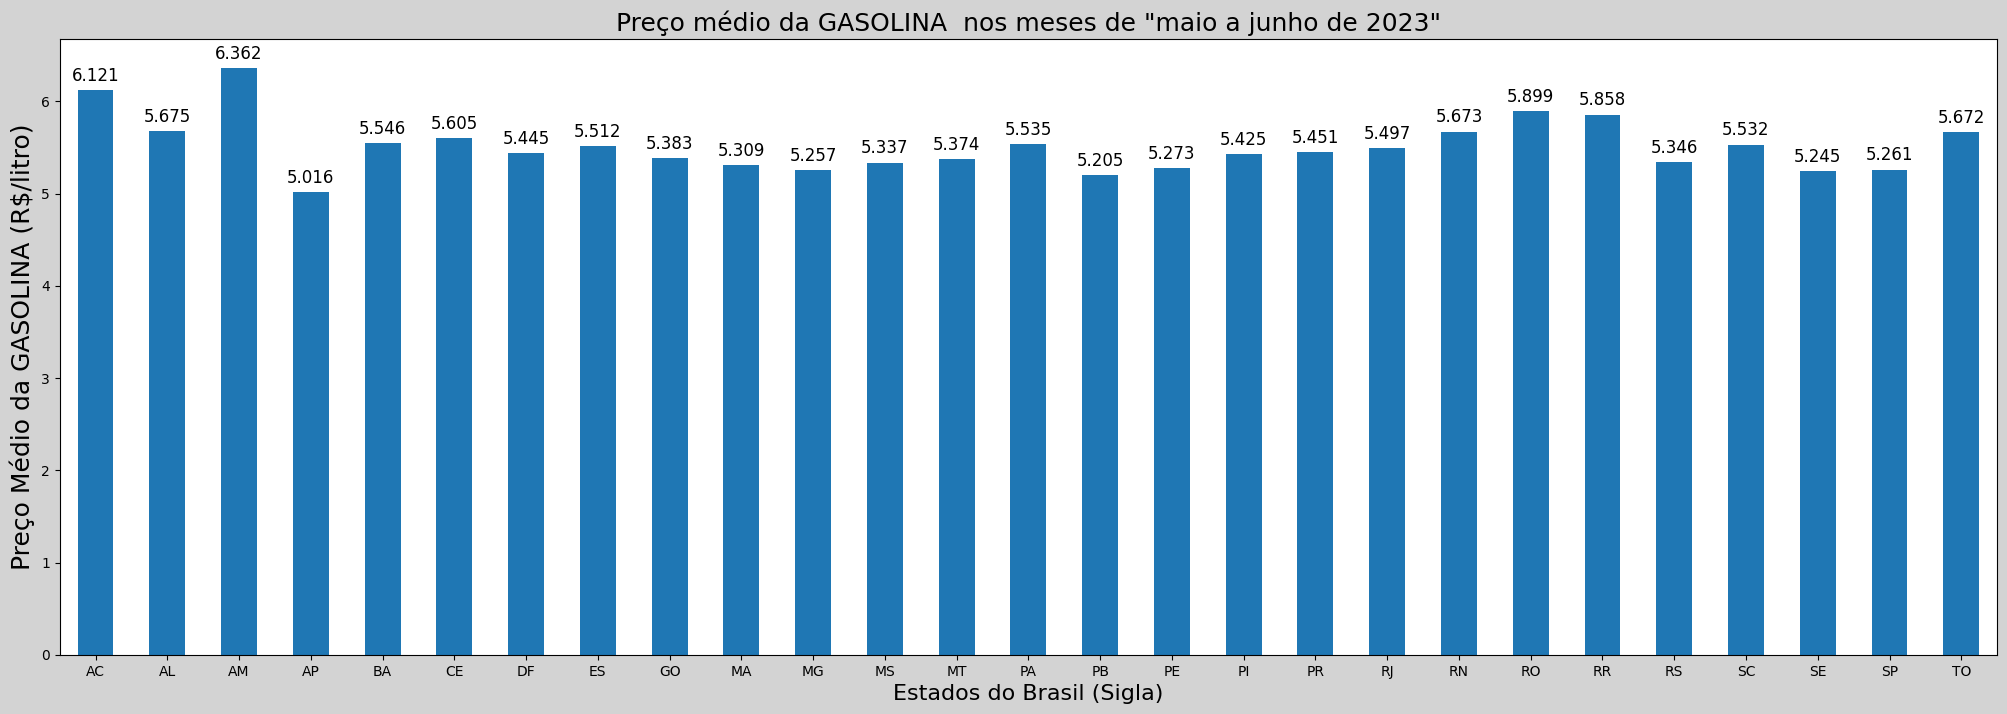

In [396]:
preco_gasolinac = df[df['Produto'] == 'GASOLINA'].groupby('Sigla_Estado')['Valor_de_Venda'].mean().round(3)
preco_gasolinac


fig, ax = plt.subplots(figsize=(25, 8))
preco_gasolinac.plot(kind='bar', rot=0 )

for idx , val in enumerate(preco_gasolinac):
    txt = f'{val}'
    y_coord = val + 0.1
    x_coord = idx # posição de cada barra pode ter um delocamento ex 0.15

    # Adicionar e formatar o texto acima da barra
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12, ha='center')

plt.title('Preço médio da GASOLINA  nos meses de "maio a junho de 2023"', fontsize=18)
plt.xlabel('Estados do Brasil (Sigla)', fontsize=16)
plt.ylabel('Preço Médio da GASOLINA (R$/litro)', fontsize=18)
fig.patch.set_facecolor('lightgray')
plt.show()

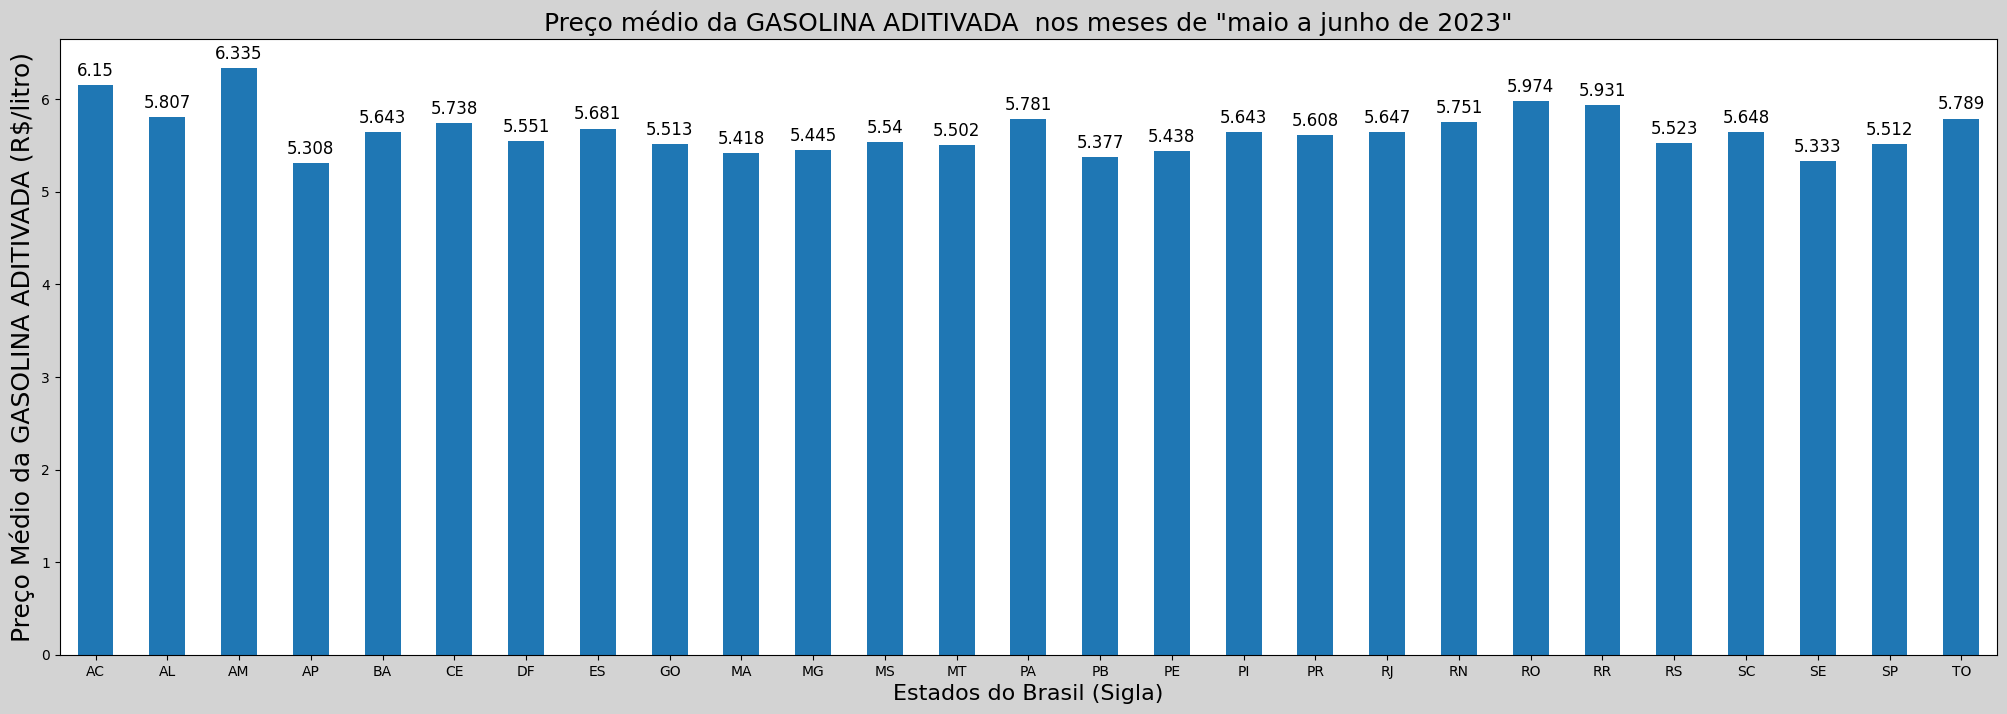

In [397]:
preco_gasolinaad = df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Sigla_Estado')['Valor_de_Venda'].mean().round(3)
preco_gasolinaad

fig, ax = plt.subplots(figsize=(25, 8))
preco_gasolinaad.plot(kind='bar', rot=0 )

for idx , val in enumerate(preco_gasolinaad):
    txt = f'{val}'
    y_coord = val + 0.1
    x_coord = idx # posição de cada barra pode ter um delocamento ex 0.15

    # Adicionar e formatar o texto acima da barra
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12, ha='center')

plt.title('Preço médio da GASOLINA ADITIVADA  nos meses de "maio a junho de 2023"', fontsize=18)
plt.xlabel('Estados do Brasil (Sigla)', fontsize=16)
plt.ylabel('Preço Médio da GASOLINA ADITIVADA (R$/litro)', fontsize=18)
fig.patch.set_facecolor('lightgray')
plt.show()

 <font size=6>5. Qual o município que possui o menor preço para a gasolina e para o etanol?

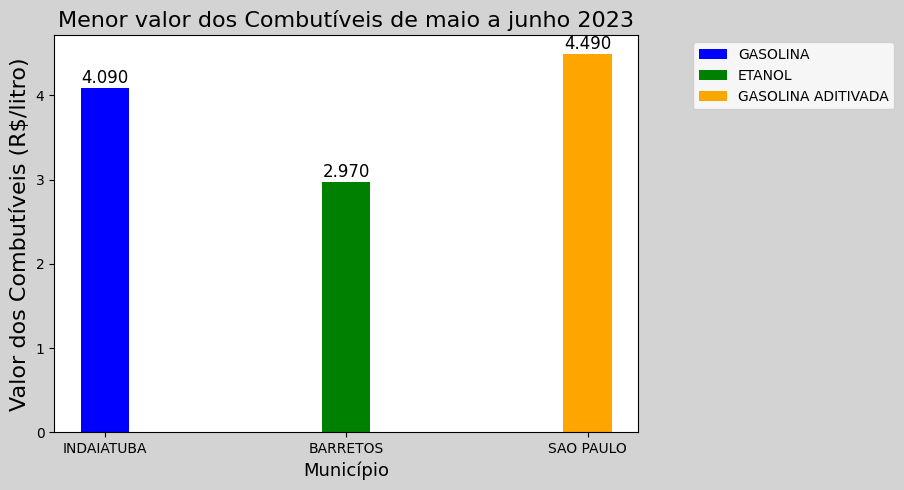

In [398]:
# gráficos
fig, ax = plt.subplots(figsize=(10, 5));

# legendas
plt.xlabel('Município', fontsize=13)
plt.ylabel('Valor dos Combutíveis (R$/litro)', fontsize=16)
plt.title('Menor valor dos Combutíveis de maio a junho 2023', fontsize=16)

#----------------------------------------------------------------------------------------------------------------------------------------------
# filtra menor valor para gasolina comun
menor_gasolinac = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor_de_Venda'].min()

# pega o municipio com o menor valor e o menor valor
municipio_menor_valor = menor_gasolinac.idxmin()
valor_menor = menor_gasolinac.min()

# configuração da barra eixo x e eixo y
plt.bar(municipio_menor_valor, valor_menor, color='blue', width=0.2, label = 'GASOLINA')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_menor_valor, valor_menor + 0.01, f'{valor_menor:.3f}', ha='center', va='bottom', fontsize=12)


#--------------------------------------------------------------------------------------------------------------------------------------------------
# filtra menor valor para etanol comun
menor_etanol = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'ETANOL'].groupby('Municipio')['Valor_de_Venda'].min()

# pega o municipio com o menor valor e o menor valor
municipio_menor_valor1 = menor_etanol.idxmin()
valor_menor1 = menor_etanol.min()


# configuração da barra eixo x e eixo y
plt.bar(municipio_menor_valor1, valor_menor1, color='Green', width=0.2, label = 'ETANOL')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_menor_valor1, valor_menor1 + 0.01, f'{valor_menor1:.3f}', ha='center', va='bottom', fontsize=12)

#---------------------------------------------------------------------------------------------------------------------------------------------------

menor_gasolina_adit= tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor_de_Venda'].min()
municipio_menor_valor2 = menor_gasolina_adit.idxmin()
valor_menor2 = menor_gasolina_adit.min()

# configuração da barra eixo x e eixo y
plt.bar(municipio_menor_valor2, valor_menor2, color='Orange', width=0.2, label = 'GASOLINA ADITIVADA')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_menor_valor2, valor_menor2 + 0.01, f'{valor_menor2:.3f}', ha='center', va='bottom', fontsize=12)
#---------------------------------------------------------------------------------------------------------------------------------------------------

# legenda e suas configurações
plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45, 1))
fig.patch.set_facecolor('lightgray')
# organiza os nomes graficos do layout
plt.tight_layout()
# tira a legenda automática e exibe o gráfico
plt.show()

<font size=6>6. Qual o município que possui o maior preço para a gasolina e para o etanol?

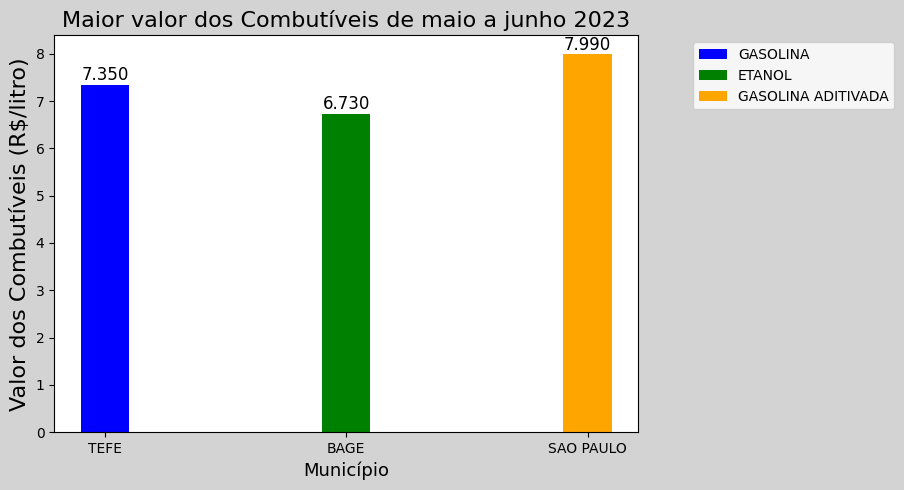

In [399]:
#gráficos
fig, ax = plt.subplots(figsize=(10, 5));

# legendas
plt.xlabel('Município', fontsize=13)
plt.ylabel('Valor dos Combutíveis (R$/litro)', fontsize=16)
plt.title('Maior valor dos Combutíveis de maio a junho 2023', fontsize=16)

#----------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_gasolinac = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor_de_Venda'].max()

# pegar o municipio com o maior valor e o maior valor  menor
municipio_maior_valor = maior_gasolinac.idxmax()
valor_maior = maior_gasolinac.max()

# configuração da barra eixo x e eixo y
plt.bar(municipio_maior_valor, valor_maior, color='blue', width=0.2, label = 'GASOLINA')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_maior_valor, valor_maior + 0.01, f'{valor_maior:.3f}', ha='center', va='bottom', fontsize=12)


#--------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para etanol aditivada comun
maior_etanol = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'ETANOL'].groupby('Municipio')['Valor_de_Venda'].max()

# pegar o municipio com o maior valor e o maior valor  menor
municipio_maior_valor1 = maior_etanol.idxmax()
valor_maior1 = maior_etanol.max()


# configuração da barra eixo x e eixo y
plt.bar(municipio_maior_valor1, valor_maior1, color='Green', width=0.2, label = 'ETANOL')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_maior_valor1, valor_maior1 + 0.01, f'{valor_maior1:.3f}', ha='center', va='bottom', fontsize=12)

#---------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina aditivada comun
maior_gasolina_adit= tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor_de_Venda'].max()

# pegar o municipio com o maior valor e o maior valor  menor
municipio_maior_valor2 = maior_gasolina_adit.idxmax()
valor_maior2 = maior_gasolina_adit.max()

# configuração da barra eixo x e eixo y
plt.bar(municipio_maior_valor2, valor_maior2, color='Orange', width=0.2, label = 'GASOLINA ADITIVADA')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_maior_valor2, valor_maior2 + 0.01, f'{valor_maior2:.3f}', ha='center', va='bottom', fontsize=12)
#-------------------------------------------------------------------------------------------------------------------------------------------------------

# legenda e suas configurações
plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45, 1))

# organiza os nomes e graficos do layout
plt.tight_layout()
fig.patch.set_facecolor('lightgray')
# tira a legenda automática e exibe o gráfico
plt.show()

<font size=6> 7. Qual a região que possui o maior valor médio da gasolina?

* Gasolina C

O valor médio da gasolina, é maior na região Norte. Tendo valor de R$ 5,779(aproximado).

Enquanto a região Sudeste tem a gasolina mais barata. Com média de R$5,308(aproximado).

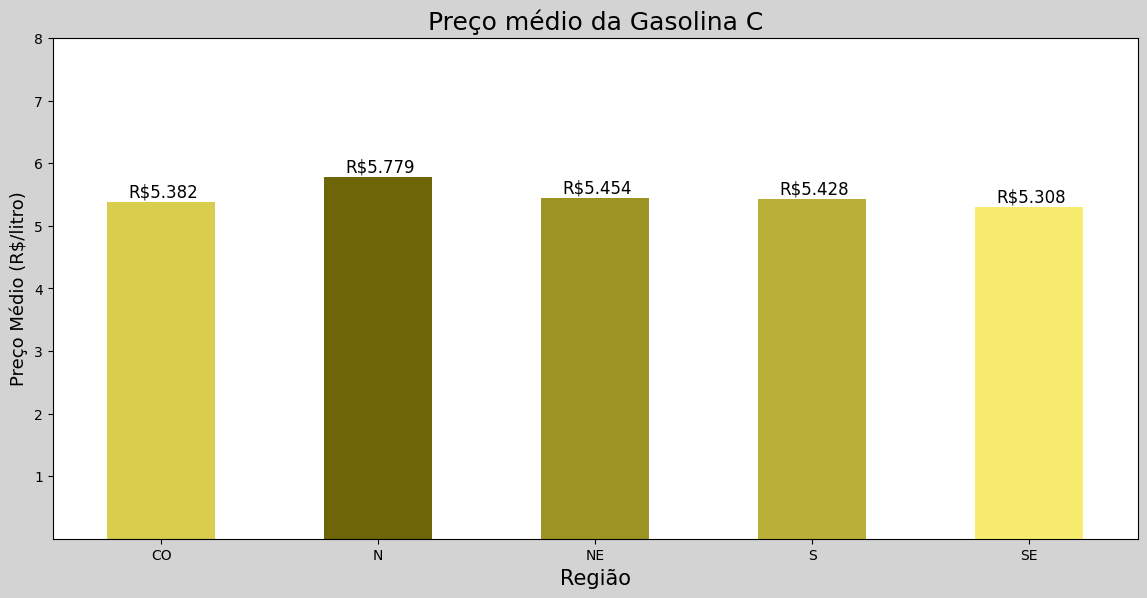

In [400]:
# Extraindo somente os resultados para gasolina.
# Verificando ovalor médio por região para a 'Gasolina' e mostrar o resultado.
media_regiao = df[df['Produto'] == 'GASOLINA'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)
media_regiao

# Usando o Matplotlib para plotar o gráfico.
fig, ax = plt.subplots(figsize=(14, 6.5))
media_regiao.plot(kind='bar', rot=0, color=['#D9CD4E','#6E6509','#9D9325','#BAAF37','#F8EC6F'] )

# Adicionando valores no topo das barras.
for idx , val in enumerate(media_regiao):
    txt = f'R${val}'
    y_coord = val + 0.08
    x_coord = idx - 0.15
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12)

plt.title('Preço médio da Gasolina C', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio (R$/litro)', fontsize=13)
plt.yticks([1,2,3,4,5,6,7,8])
fig.patch.set_facecolor('lightgray')


plt.show()

* Gasolina Aditivada

Obtemos o resultado da gasolina aditivada, também com maior valor médio na região Norte. Tendo seu valor de R$ 5,946(aproximado).

Já a região Centro Oeste conta com a gasolina mais barata. Com média de R$ 5,524(aproximado).

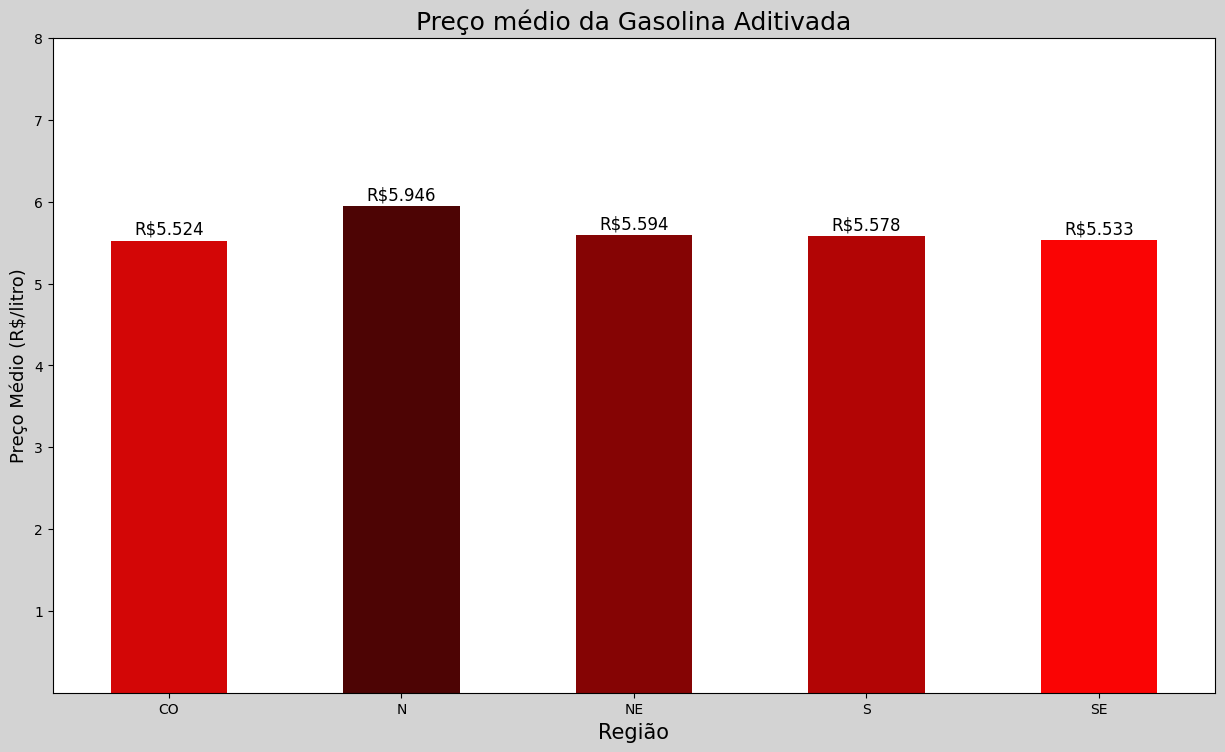

In [401]:
# Extraindo somente os resultados para gasolina aditivada.
# Verificando ovalor médio por região para a 'Gasolina Aditivada' e mostrar o resultado.
media_regiao = df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)
media_regiao

# Usando o Matplotlib para plotar o gráfico.
fig, ax = plt.subplots(figsize=(15, 8.5))
media_regiao.plot(kind='bar', rot=0, color=['#D30606','#4d0404','#850404','#B20505','#Fa0404'] )

# Adicionando valores no topo das barras.
for idx , val in enumerate(media_regiao):
    txt = f'R${val}'
    y_coord = val + 0.08
    x_coord = idx - 0.15
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12)

plt.title('Preço médio da Gasolina Aditivada', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio (R$/litro)', fontsize=13)
plt.yticks([1,2,3,4,5,6,7,8])
fig.patch.set_facecolor('lightgray')

plt.show()

<font size=6> 8. Qual a região que possui o menor valor médio do etanol?

* Etanol

A região Centro Oeste representa o menor valor médio do Etanol. Com valor de R$ 3,861(aproximado).

Em contra partida o combustível esteve mais caro na região Norte. Com média de R$ 4,718(aproximado).

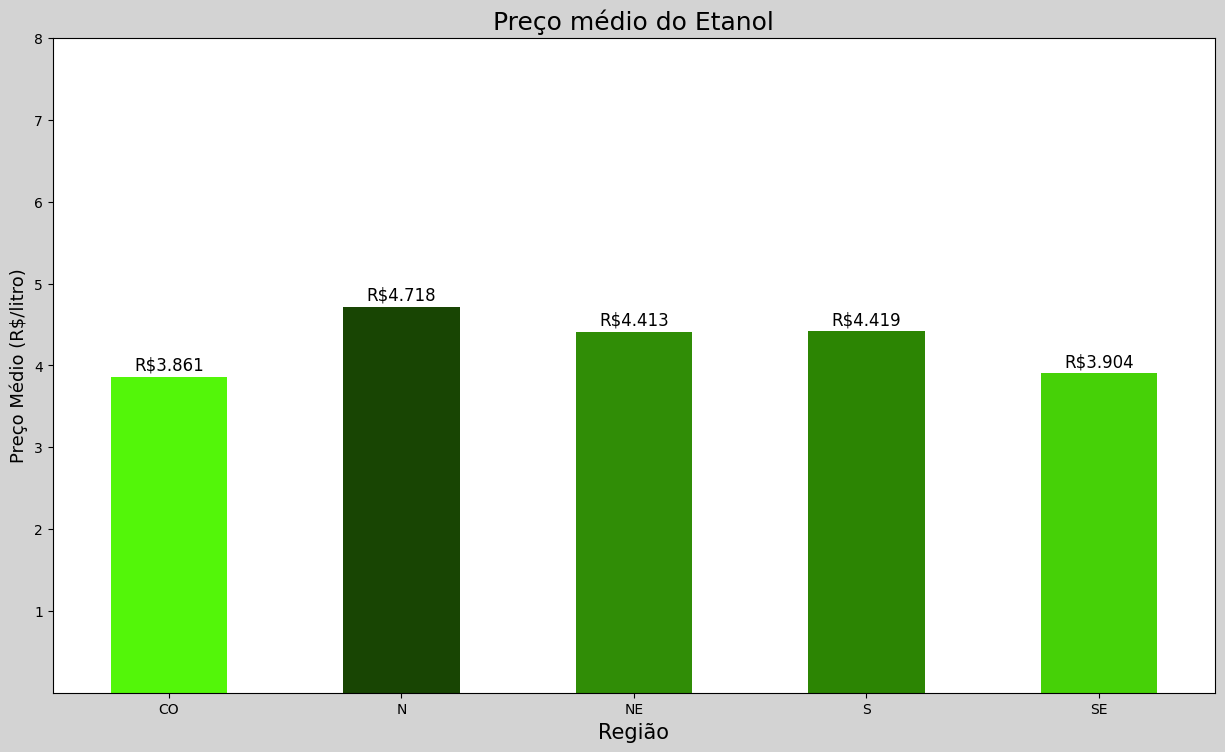

In [402]:
# Extraindo somente os resultados do Etanol.
# Verificando o valor médio por região para o 'Etanol' e mostrar o resultado.
media_regiao = df[df['Produto'] == 'ETANOL'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)
media_regiao

# Usando o Matplotlib para plotar o gráfico.
fig, ax = plt.subplots(figsize=(15, 8.5), label='Média referente aos Meses Maio e Junho')
media_regiao.plot(kind='bar', rot=0, color=['#53f609','#184503','#308d06','#2c8503','#46d107'] )

# Adicionando valores no topo das barras.
for idx , val in enumerate(media_regiao):
    txt = f'R${val}'
    y_coord = val + 0.08
    x_coord = idx - 0.15
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12)

plt.title('Preço médio do Etanol', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio (R$/litro)', fontsize=13)
plt.yticks([1,2,3,4,5,6,7,8])
fig.patch.set_facecolor('lightgray')

plt.show()

<font size=6>11. Qual a Bandeira que possui o maior preço para a gasolina e para o etanol?

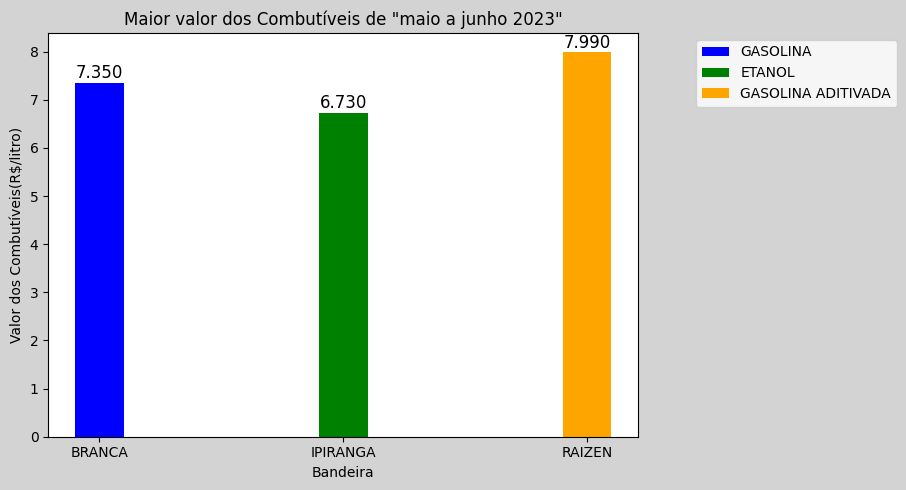

In [403]:
# gráficos
fig, ax = plt.subplots(figsize=(10, 5));

# legendas
plt.xlabel('Bandeira')
plt.ylabel('Valor dos Combutíveis(R$/litro)')
plt.title('Maior valor dos Combutíveis de "maio a junho 2023"')

#----------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_gasolinac = df[df['Produto'] == 'GASOLINA'].groupby('Bandeira')['Valor_de_Venda'].max()

# pega a bandeira com o maior valor
bandeira_maior_valorb = maior_gasolinac.idxmax()
valor_maiorb = maior_gasolinac.max()

# configuração da barra eixo x e eixo y
plt.bar(bandeira_maior_valorb, valor_maiorb, color='blue', width=0.2, label = 'GASOLINA')

# coloca o nome da bandeira no eixo e e o valor acima do gráfico e suas configurações
plt.text(bandeira_maior_valorb, valor_maiorb + 0.01, f'{valor_maiorb:.3f}', ha='center', va='bottom', fontsize=12)


#--------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_etanolb = df[df['Produto'] == 'ETANOL'].groupby('Bandeira')['Valor_de_Venda'].max()

# pega a bandeira com o maior valor
bandeira_maior_valor1b = maior_etanolb.idxmax()
valor_maior1b = maior_etanolb.max()


# configuração da barra eixo x e eixo y
plt.bar(bandeira_maior_valor1b, valor_maior1b, color='Green', width=0.2, label = 'ETANOL')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(bandeira_maior_valor1b, valor_maior1b + 0.01, f'{valor_maior1b:.3f}', ha='center', va='bottom', fontsize=12)

#---------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_gasolina_aditb= df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Bandeira')['Valor_de_Venda'].max()

# pega a bandeira com o maior valor
bandeira_maior_valor2b = maior_gasolina_aditb.idxmax()
valor_maior2b = maior_gasolina_aditb.max()

# configuração da barra eixo x e eixo y
plt.bar(bandeira_maior_valor2b, valor_maior2b, color='Orange', width=0.2, label = 'GASOLINA ADITIVADA')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(bandeira_maior_valor2b, valor_maior2b + 0.01, f'{valor_maior2b:.3f}', ha='center', va='bottom', fontsize=12)
#---------------------------------------------------------------------------------------------------------------------------------------------------

# legenda e suas configurações
plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45, 1))

fig.patch.set_facecolor('lightgray')
# organiza os nomes graficos do layout
plt.tight_layout()
# tira a legenda automática e exibe o gráfico
plt.show()

## **Conclusão:**

## **Referências:**
- Site do Governo (https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis)
- Site da SEADE (https://www.seade.gov.br/)
